**Dataset Description**

This dataset contains house sale prices for King County, 

which includes Seattle. It includes homes sold between May 2014 and May 2015.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
#read the dataset
df=pd.read_csv('kc_house_data.csv')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**assess dataset**

In [3]:
df.shape

(21613, 21)

In [4]:
#checking data types for columns
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
#checking missing value for columns
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
#checking dublicated data
df.duplicated().sum()

0

In [7]:
df['view'].nunique()

5

In [8]:
df['view'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [9]:
#statistical summary
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**clean dataset**

1- There are some datatypes of some columns that should be changed like (date , yr_built , yr_removed)

to datetime type , and (bathrooms , floors) to int.




In [10]:
#change datatype for column (date) object------>Datetime

#code
df['date']=pd.to_datetime(df['date'])

#test
df['date'].head(3)

0   2014-10-13
1   2014-12-09
2   2015-02-25
Name: date, dtype: datetime64[ns]

In [11]:
#change datatype for column (yr_built , yr_removed) int------>Datetime

#code
df['yr_built']=pd.to_datetime(df['yr_built'])

#code
df['yr_renovated']=pd.to_datetime(df['yr_renovated'])


In [12]:
#change datatype for column (bathrooms , floors) float------>int

#code
df['bathrooms']=df['bathrooms'].astype(int)

#code
df['floors']=df['floors'].astype(int)

#test
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms                 int32
sqft_living               int64
sqft_lot                  int64
floors                    int32
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built         datetime64[ns]
yr_renovated     datetime64[ns]
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [13]:
#drop column id

#code
df=df.drop(['id'],axis=1)


In [14]:
#test
df.head(1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1970-01-01 00:00:00.000001955,1970-01-01,98178,47.5112,-122.257,1340,5650


**Perform EDA (Exploratory data analysis)**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000251F68D09E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000251F6D0D358>]], dtype=object)

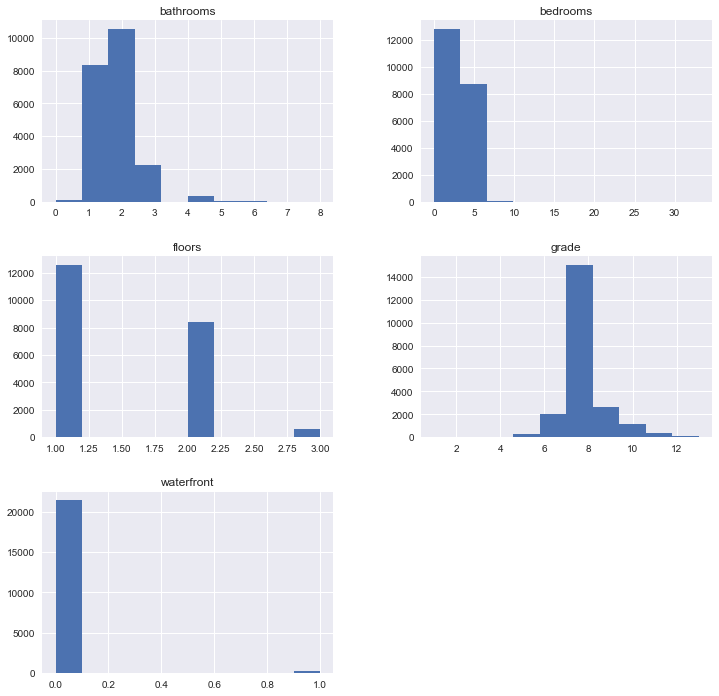

In [15]:
sdf=df[['bedrooms','bathrooms','floors','grade','waterfront']]

sdf.hist(figsize=(12,12))


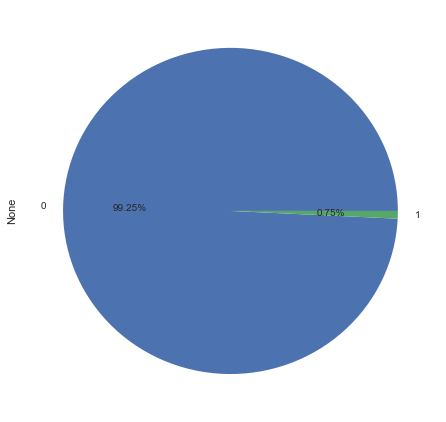

In [18]:
#The percentage of houses which have waterfront.
df.groupby('waterfront').size().plot(kind='pie',autopct='%.2f%%',labels = ['0','1'],figsize=(7.5,7.5))

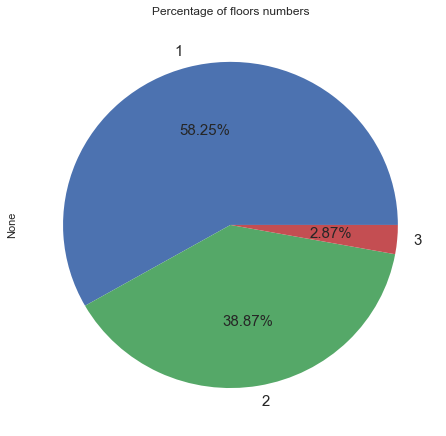

In [19]:
df.groupby('floors').size().plot(kind = 'pie' , title = 'Percentage of floors numbers' , autopct = "%.2f%%" , labels = set(df.floors) , figsize =(7.5,7.5) , fontsize=15)


**Conclusion**

1- Waterfront : Most houses don't have waterfront.
    

2- Grades : Most houses have garde between (7 or 8) , and the other houses their grades values are low.

3- Floors : More than 55% of houses contains only one floor , about 40% of houses contains two floors and a very few percentage of house that have 3 floors.

4- Bathrooms : More than 10000 houses have 2 bathroooms, More than 8000 houses have 1 bathroooms, almost 2100 houses  have 3 bathrooms and very few houses have more than 3 bathrooms.

5-Bedrooms :most houses have bedrooms betwwen(1 to 5) and few houses have more than 5 bedrooms.


            price  bedrooms
price     1.00000   0.30835
bedrooms  0.30835   1.00000


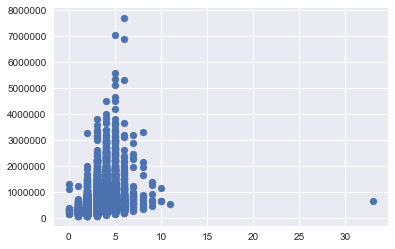

In [59]:
#relationship between price & Bedrooms
print(df[['price','bedrooms']].corr())

plt.scatter(data=df,x='bedrooms',y='price')
plt.show()

Conclusion : correlation value=0.3 , the relationship between number of bedrooms and price of houses is weak.

              price  bathrooms
price      1.000000   0.510072
bathrooms  0.510072   1.000000


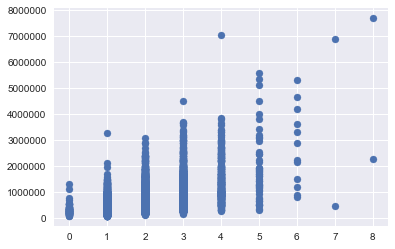

In [60]:
#relationship between price & Bedrooms
print(df[['price','bathrooms']].corr())

plt.scatter(data=df,x='bathrooms',y='price')
plt.show()

Conclusion : correlation value=0.5 , the relationship between number of bathrooms and price of houses is moderate

                price  sqft_living
price        1.000000     0.702035
sqft_living  0.702035     1.000000


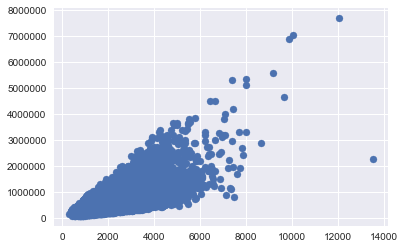

In [62]:
#The relationship between sqft_living and price

print(df[['price','sqft_living']].corr())

plt.scatter(data=df,x='sqft_living',y='price')
plt.show()


Conclusion :correlation value=0.7 , the relationship between number of bathrooms and price of houses is strong somehow, it means that any change in the value of the square footage affects on the price of house.

          price      long
price  1.000000  0.021626
long   0.021626  1.000000


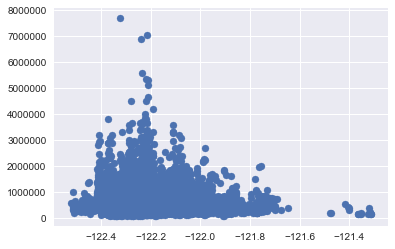

In [64]:
#The relationship between Longitude coordinate and price
print(df[['price','long']].corr())

plt.scatter(data=df,x='long',y='price')
plt.show()


Conclusion : correlation value=0.02 , the relationship between number of long and price of houses is very very week

**copy the data in new dataframe**

In [28]:
df_1=df.copy()

**some predictive analysis**

In [20]:
from sklearn.linear_model import LinearRegression
line_fitter=LinearRegression()

In [29]:
x=df_1[['sqft_living']]
y=df_1[['price']]
line_fitter.fit(x,y)
print("The price value increases by =" , line_fitter.coef_ , "when the square footage increases by 1")
print("When sqft_living = 0 , the price value decreases by" , line_fitter.intercept_)

The price value increases by = [[ 280.6235679]] when the square footage increases by 1
When sqft_living = 0 , the price value decreases by [-43580.74309448]


**predict the price based on sqft_living  , bedrooms  , bathrooms  , floors ,  grade  , waterfront**

In [33]:
x=df[['sqft_living','bedrooms','bathrooms','floors','grade','waterfront']]
y=df[['price']]
line_fitter.fit(x,y)
y_predicted=line_fitter.predict(x)

In [34]:
print(y_predicted)

[[ 317079.00700531]
 [ 540740.86954842]
 [ 171787.1825015 ]
 ..., 
 [ 224081.40530503]
 [ 459894.12359295]
 [ 224081.40530503]]


In [35]:
#add predicted_price column to dataframe
df_1['predicted_price']=y_predicted

In [36]:
df_1.head(50)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,predicted_price
0,2014-10-13,221900.0,3,1,1180,5650,1,0,0,3,...,1180,0,1970-01-01 00:00:00.000001955,1970-01-01 00:00:00.000000000,98178,47.5112,-122.257,1340,5650,3.170790e+05
1,2014-12-09,538000.0,3,2,2570,7242,2,0,0,3,...,2170,400,1970-01-01 00:00:00.000001951,1970-01-01 00:00:00.000001991,98125,47.7210,-122.319,1690,7639,5.407409e+05
2,2015-02-25,180000.0,2,1,770,10000,1,0,0,3,...,770,0,1970-01-01 00:00:00.000001933,1970-01-01 00:00:00.000000000,98028,47.7379,-122.233,2720,8062,1.717872e+05
3,2014-12-09,604000.0,4,3,1960,5000,1,0,0,5,...,1050,910,1970-01-01 00:00:00.000001965,1970-01-01 00:00:00.000000000,98136,47.5208,-122.393,1360,5000,4.860632e+05
4,2015-02-18,510000.0,3,2,1680,8080,1,0,0,3,...,1680,0,1970-01-01 00:00:00.000001987,1970-01-01 00:00:00.000000000,98074,47.6168,-122.045,1800,7503,5.471163e+05
5,2014-05-12,1225000.0,4,4,5420,101930,1,0,0,3,...,3890,1530,1970-01-01 00:00:00.000002001,1970-01-01 00:00:00.000000000,98053,47.6561,-122.005,4760,101930,1.599344e+06
6,2014-06-27,257500.0,3,2,1715,6819,2,0,0,3,...,1715,0,1970-01-01 00:00:00.000001995,1970-01-01 00:00:00.000000000,98003,47.3097,-122.327,2238,6819,3.767638e+05
7,2015-01-15,291850.0,3,1,1060,9711,1,0,0,3,...,1060,0,1970-01-01 00:00:00.000001963,1970-01-01 00:00:00.000000000,98198,47.4095,-122.315,1650,9711,2.940647e+05
8,2015-04-15,229500.0,3,1,1780,7470,1,0,0,3,...,1050,730,1970-01-01 00:00:00.000001960,1970-01-01 00:00:00.000000000,98146,47.5123,-122.337,1780,8113,4.321506e+05
9,2015-03-12,323000.0,3,2,1890,6560,2,0,0,3,...,1890,0,1970-01-01 00:00:00.000002003,1970-01-01 00:00:00.000000000,98038,47.3684,-122.031,2390,7570,4.103264e+05


# E    N     D